## Importing Basic Libraries

In [1]:
# lets import the basic Libraries
import numpy as np
import pandas as pd
import pandas_profiling as profile

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bubbly.bubbly import bubbleplot
from plotly.offline import iplot

# for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

## Lets read the Dataset

In [2]:
# lets read the dataset
data = pd.read_csv('movie_metadata.csv')

# lets check the shape
print(data.shape)

(5043, 28)


In [7]:
# lets check the columns
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
# lets check the head of the dataset
pd.set_option('max_columns', 30)
data.head(3)

color   director_name  num_critic_for_reviews  duration  \
0  Color   James Cameron                   723.0     178.0   
1  Color  Gore Verbinski                   302.0     169.0   
2  Color      Sam Mendes                   602.0     148.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   

      actor_1_name                                movie_title  \
0      CCH Pounder                                    Avatar    
1      Johnny Depp  Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                   Spectre    

   num_voted_users  cast_total_facebook_likes      actor_3_name  \
0           886204                       4834         Wes Studi   
1           471220                      48350    Jack Davenport   
2           275868                      11700  Stephanie Sigman   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   
2  English      UK          PG-13  245000000.0      2015.0   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000

In [9]:
# lets check the tail of the dataset
data.tail(3)

color     director_name  num_critic_for_reviews  duration  \
5040  Color  Benjamin Roberds                    13.0      76.0   
5041  Color       Daniel Hsia                    14.0     100.0   
5042  Color          Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes    gross                 genres actor_1_name  \
5040                     0.0      NaN  Drama|Horror|Thriller  Eva Boehnke   
5041                   946.0  10443.0   Comedy|Drama|Romance    Alan Ruck   
5042                    86.0  85222.0            Documentary  John August   

                movie_title  num_voted_users  cast_total_facebook_likes  \
5040  A Plague So Pleasant                38                          0   
5041      Shanghai Calling              1255                       2386   
5042     My Date with Drew              4285                        163   

        actor_3_name  facenumber_in_poster  \
5040  David Chandler                   0.0   
5041     Eliza Coupe                   5.0   
5042        Jon Gunn                   0.0   

                                          plot_keywords  \
5040                                                NaN   
5041                                                NaN   
5042  actress name in title|crush|date|four word tit...   

                                        movie_imdb_link  num_user_for_reviews  \
5040  http://www.imdb.com/title/tt2107644/?ref_=fn_t...                   3.0   
5041  http://www.imdb.com/title/tt2070597/?ref_=fn_t...                   9.0   
5042  http://www.imdb.com/title/tt0378407/?ref_=fn_t...                  84.0   

     language country content_rating  budget  title_year  \
5040  English     USA            NaN  1400.0      2013.0   
5041  English     USA          PG-13     NaN      2012.0   
5042  English     USA             PG  1100.0      2004.0   

      actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
5040                     0.0         6.3           NaN                    16  
5041                   719.0         6.3          2.35                   660  
5042                    23.0         6.6          1.85                   456

In [10]:
# lets also check some samples of the data
data.sample(3)

color     director_name  num_critic_for_reviews  duration  \
851   Color  Gabriele Muccino                   201.0     117.0   
440   Color     Todd Phillips                   383.0     102.0   
3324  Color       Martyn Pick                    19.0      76.0   

      director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
851                     125.0                   168.0        Kurt Fuller   
440                     480.0                   461.0          Mason Lee   
3324                      4.0                   151.0  Steven Waddington   

      actor_1_facebook_likes        gross  \
851                  10000.0  162586036.0   
440                  14000.0  254455986.0   
3324                   722.0          NaN   

                                                 genres    actor_1_name  \
851                                     Biography|Drama      Will Smith   
440                                              Comedy  Bradley Cooper   
3324  Action|Animation|Fantasy|Horror|Mystery|Sci-Fi...    Sean Pertwee   

                                  movie_title  num_voted_users  \
851                 The Pursuit of Happyness            338383   
440                     The Hangover Part II            375879   
3324  Ultramarines: A Warhammer 40,000 Movie              4990   

      cast_total_facebook_likes    actor_3_name  facenumber_in_poster  \
851                       11036     James Karen                   0.0   
440                       16143      Mike Tyson                   0.0   
3324                       1254  Donald Sumpter                   0.0   

                                          plot_keywords  \
851          bus|intern|internship|salesman|stockbroker   
440   hotel|male frontal nudity|pubic hair|thailand|...   
3324  grimdark|mutilated corpse|space marine|ultrama...   

                                        movie_imdb_link  num_user_for_reviews  \
851   http://www.imdb.com/title/tt0454921/?ref_=fn_t...                 611.0   
440   http://www.imdb.com/title/tt1411697/?ref_=fn_t...                 402.0   
3324  http://www.imdb.com/title/tt1679332/?ref_=fn_t...                  64.0   

     language country content_rating      budget  title_year  \
851   English     USA          PG-13  55000000.0      2006.0   
440   English     USA              R  80000000.0      2011.0   
3324  English      UK              R         NaN      2010.0   

      actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
851                    617.0         8.0          2.35                 32000  
440                    670.0         6.5          2.35                 56000  
3324                   212.0         5.7          1.85                     0

In [11]:
# lets check the basic information in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

## Inferential Statistics

In [8]:
x = data.describe()
x.style.bar(color = ['red','green'], align = 'mid')

In [9]:
x = data.cov()
x.style.bar(color = ['red', 'blue'], align = 'mid')

In [10]:
x = data.corr()
x.style.bar(color = ['red', 'yellow'], align = 'mid')

In [11]:
x = data.isnull().sum()
x = pd.DataFrame(x)
x.style.bar()

## Data Profile

In [12]:
# lets get a profile report for the data

profile.ProfileReport(data, correlations={"cramers": {"calculate": False}})

## Data Visualization

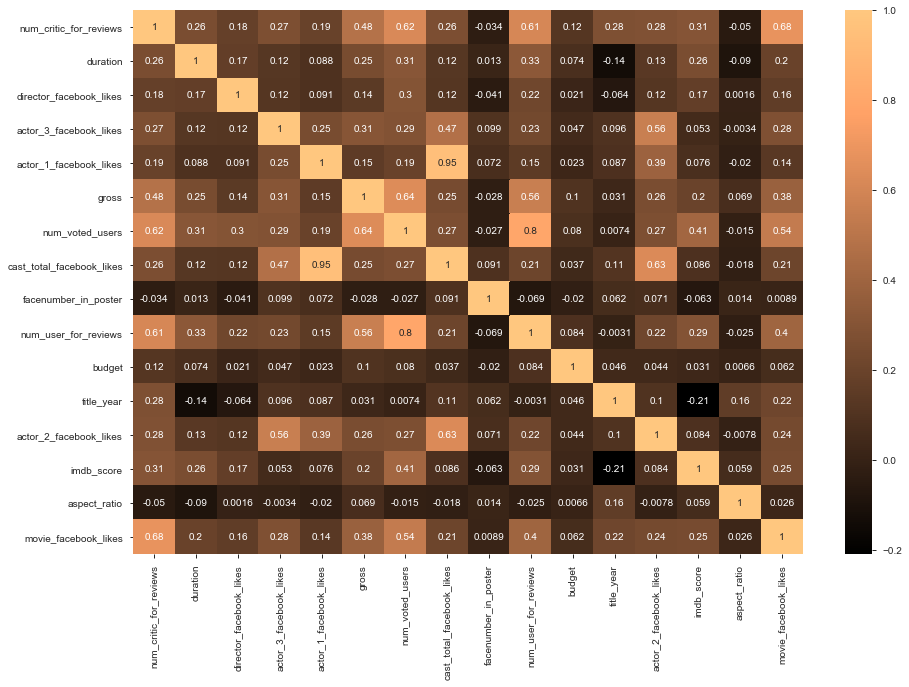

In [13]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(data.corr(), annot = True, cmap = 'copper')
plt.show()

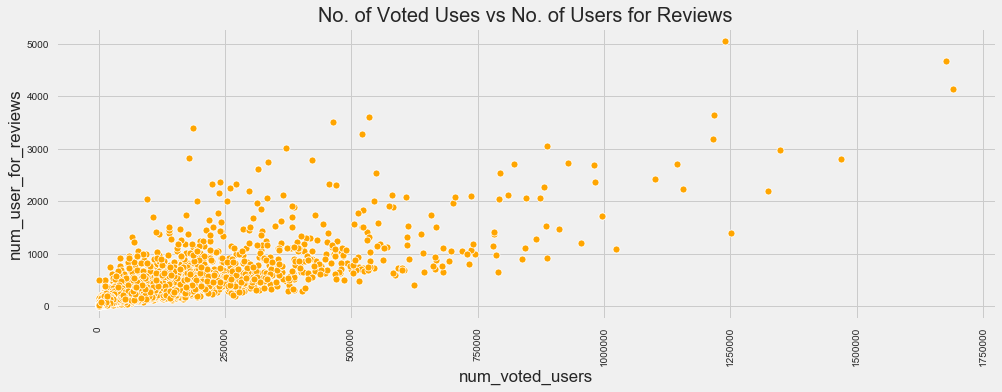

In [14]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(data['num_voted_users'],
            data['num_user_for_reviews'],
            color = 'orange',
            )
plt.title('No. of Voted Uses vs No. of Users for Reviews', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

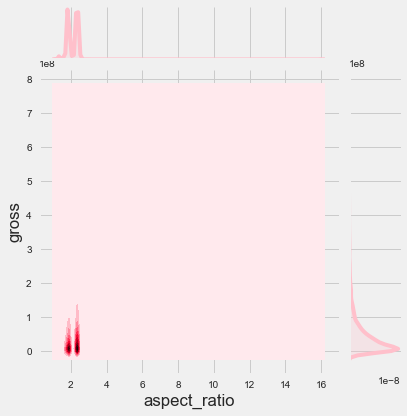

In [15]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 5)
sns.jointplot(data['aspect_ratio'],
            data['gross'],
            color = 'pink',
            kind = 'kde')
plt.xticks(rotation = 90)
plt.show()

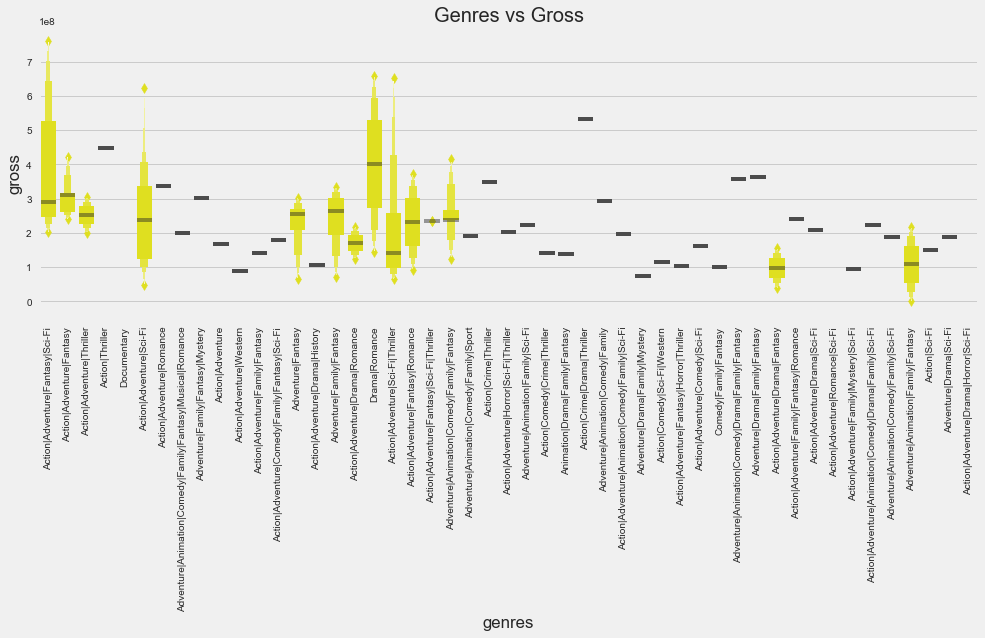

In [16]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.boxenplot(data['genres'][:100],
              data['gross'],
                color = 'yellow')
plt.title('Genres vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

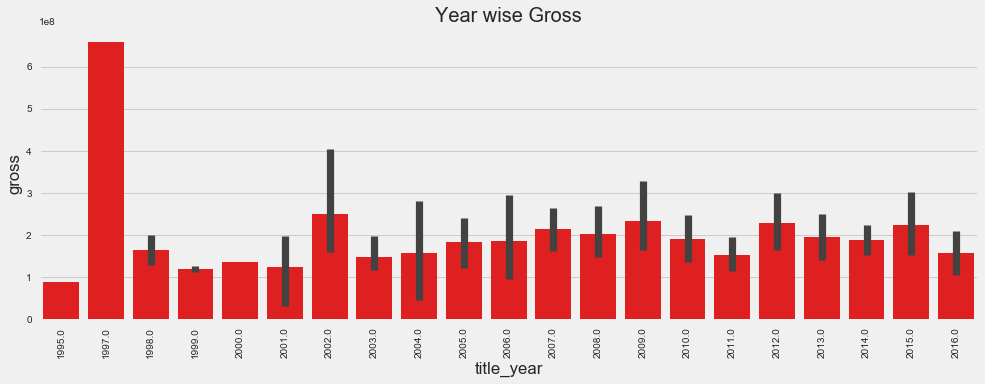

In [17]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(data['title_year'][:200],
              data['gross'],
                color = 'red')
plt.title('Year wise Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

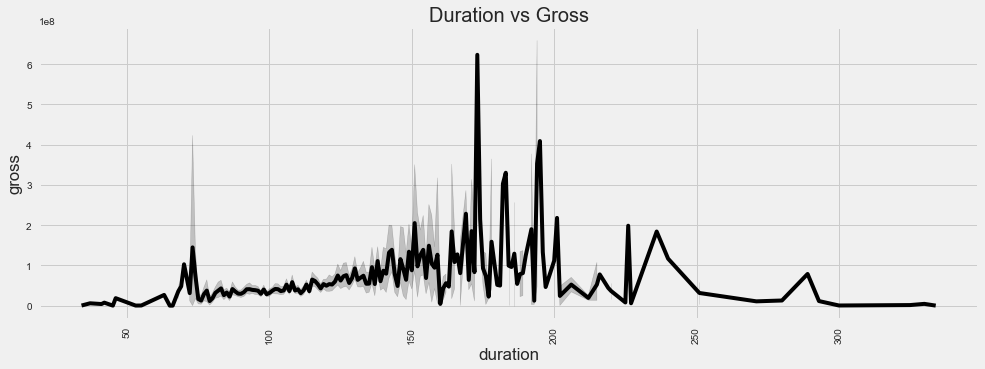

In [18]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.lineplot(data['duration'],
              data['gross'],
                color = 'black')
plt.title('Duration vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

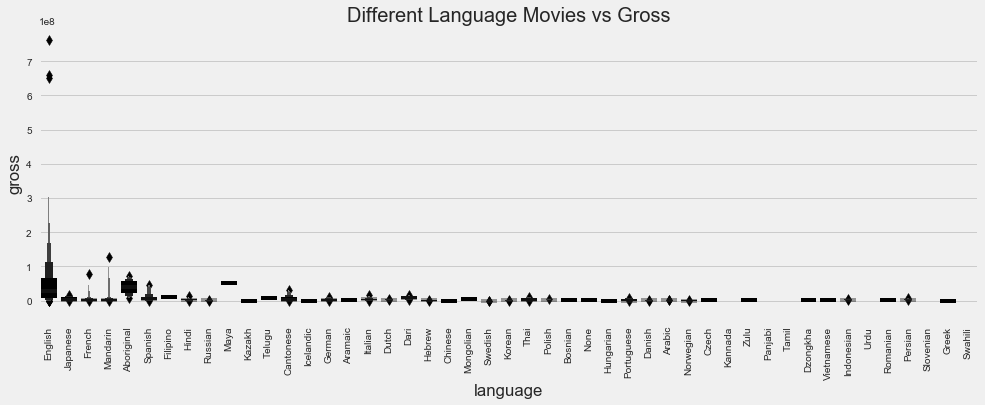

In [19]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.boxenplot(data['language'],
              data['gross'],
                color = 'black')
plt.title('Different Language Movies vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

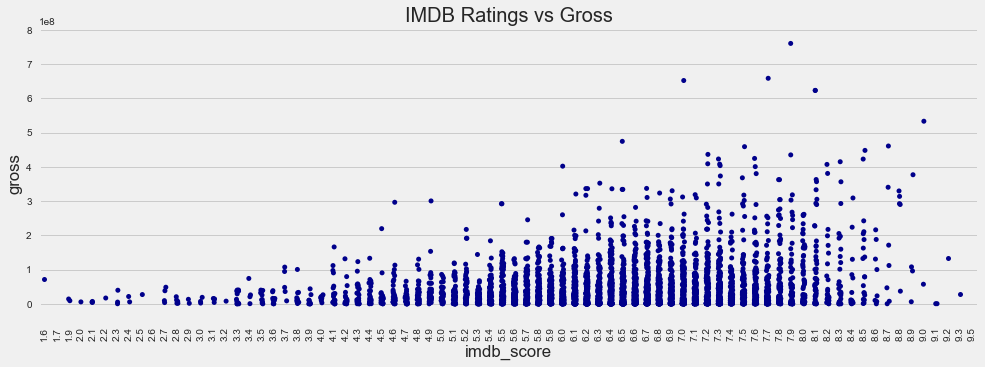

In [20]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.stripplot(data['imdb_score'],
              data['gross'],
                color = 'darkblue')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

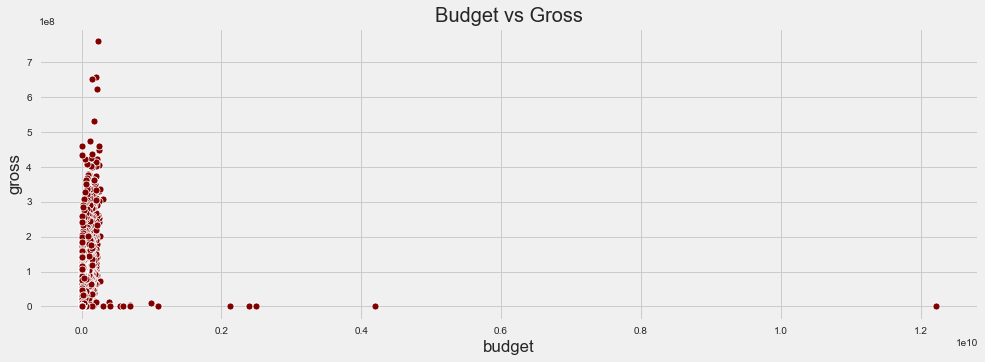

In [21]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(data['budget'],
                data['gross'],
                color = 'maroon')
plt.title('Budget vs Gross', fontsize = 20)
plt.show()

## Interactive Analysis

In [22]:
@interact_manual
def check(column = list(data.select_dtypes('number').columns)):
    sns.distplot(data[column])

interactive(children=(Dropdown(description='column', options=('num_critic_for_reviews', 'duration', 'director_…

In [23]:
@interact_manual
def check(column = list(data.select_dtypes('object').columns)):
    sns.countplot(data[column])
    

interactive(children=(Dropdown(description='column', options=('color', 'director_name', 'actor_2_name', 'genre…

In [21]:
@interact
def check(column = list(data.select_dtypes('object').columns)):
    return data[column].value_counts()

interactive(children=(Dropdown(description='column', options=('color', 'director_name', 'actor_2_name', 'genre…

In [16]:
@interact
def maxium(column = list(data.select_dtypes('number').columns)):
    print("Maximum Value :", data[column].max())
    print("Minimum Value :", data[column].min())

interactive(children=(Dropdown(description='column', options=('num_critic_for_reviews', 'duration', 'director_…

In [3]:
pd.set_option('max_rows', 3000)

@interact
def show_movies_more_than(column='imdb_score', score=9.0):
    x = data.loc[data[column] > score][['movie_title',
                                       'director_name',
                                       'actor_1_name',
                                       'actor_2_name',
                                       'actor_3_name',
                                       'budget',
                                       'gross',
                                       'imdb_score',
                                       'title_year']]
    x = x.sort_values(by = 'imdb_score', ascending = False)
    x = x.drop_duplicates(keep = 'first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [7]:
@interact
def correlations(column1 = list(data.select_dtypes('number').columns),
                 column2 = list(data.select_dtypes('number').columns)[1:]):
    print(f"Correlations: ", {data[column1].corr(data[column2])})


interactive(children=(Dropdown(description='column1', options=('num_critic_for_reviews', 'duration', 'director…

In [8]:
pd.set_option('max_rows', 30000)

@interact
def show_articles_more_than(column=['budget','gross'], x=600000000.0):
    return data.loc[data[column] > x]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), FloatSlider…

In [9]:
@interact_manual
def scatter_plot(x = list(data.select_dtypes('number').columns),
                 y = list(data.select_dtypes('number').columns)[1:],
                ):
    data.plot(kind = 'scatter',
               x = x,
               y = y,
               )

interactive(children=(Dropdown(description='x', options=('num_critic_for_reviews', 'duration', 'director_faceb…

In [12]:
@interact_manual
def line_plot(x = list(data.select_dtypes('object').columns),
                 y = list(data.select_dtypes('number').columns)[1:],
                ):
    data.plot(kind = 'line',
               x = x,
               y = y,
               )
    plt.xticks(rotation = 40)

interactive(children=(Dropdown(description='x', options=('color', 'director_name', 'actor_2_name', 'genres', '…

## Content Based Filtering

## Recommending Movies based on Languages

In [27]:
data['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Russian         11
Cantonese       11
Italian         11
Korean           8
Portuguese       8
Hebrew           5
Danish           5
Arabic           5
Swedish          5
Persian          4
Norwegian        4
Polish           4
Dutch            4
Chinese          3
Thai             3
Dari             2
Aboriginal       2
None             2
Indonesian       2
Zulu             2
Icelandic        2
Romanian         2
Vietnamese       1
Panjabi          1
Greek            1
Dzongkha         1
Aramaic          1
Filipino         1
Swahili          1
Slovenian        1
Telugu           1
Kannada          1
Hungarian        1
Tamil            1
Czech            1
Maya             1
Kazakh           1
Mongolian        1
Urdu             1
Bosnian          1
Name: language, dtype: int64

In [16]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y


In [18]:
recommend_lang('Hindi')

language                          movie_title  imdb_score
3870    Hindi                             Airlift          8.5
3685    Hindi                     Rang De Basanti          8.4
4160    Hindi                Lage Raho Munna Bhai          8.2
3344    Hindi                     My Name Is Khan          8.0
3510    Hindi                          Veer-Zaara          7.9
1056    Hindi                               Earth          7.8
4385    Hindi                        The Lunchbox          7.8
4088    Hindi                               Water          7.8
4528    Hindi  Rocket Singh: Salesman of the Year          7.5
3789    Hindi                   Gandhi, My Father          7.4
4490    Hindi                     Monsoon Wedding          7.4
3348    Hindi                     Namastey London          7.3
3877    Hindi                                 Paa          7.2
4724    Hindi                   Faith Connections          7.0
3350    Hindi             Yeh Jawaani Hai Deewani          6.9
3276    Hindi                    Jab Tak Hai Jaan          6.9
4351    Hindi           ABCD (Any Body Can Dance)          6.4
3208    Hindi                              Krrish          6.3
3695    Hindi                       Dum Maaro Dum          6.2
4572    Hindi                                Fiza          6.2
3075    Hindi              Kabhi Alvida Naa Kehna          6.0
3455    Hindi                       Ta Ra Rum Pum          5.4
4305    Hindi                      Roadside Romeo          5.3
3085    Hindi                           Housefull          5.3
4593    Hindi        Chocolate: Deep Dark Secrets          4.8
3866    Hindi                               Fugly          4.7
3665    Hindi                         Khiladi 786          4.3
4299    Hindi              Hum To Mohabbat Karega          2.8

## Recommending Movies Based on Actors

In [30]:
data.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name                                        movie_title  \
0      CCH Pounder                                            Avatar    
1      Johnny Depp          Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                           Spectre    
3        Tom Hardy                             The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
4                   0.0                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   
2  English      UK          PG-13  245000000.0      2015.0   
3  English     USA          PG-13  250000000.0      2012.0   
4      NaN     NaN            NaN          NaN         NaN   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
4                    12.0         7.1           NaN                     0

In [19]:
from pprint import pprint

pd.set_option('max_rows', 200)
x = data[['actor_2_name', 'movie_title','imdb_score']]
y = x.groupby(['actor_2_name','movie_title' ])
z = y.agg('mean')
z

imdb_score
actor_2_name       movie_title                
50 Cent            Escape Plan             6.7
                   Southpaw                7.5
                   The Prince              4.6
A. Michael Baldwin Phantasm II             6.5
A.J. Buckley       Jimmy and Judy          6.2
...                                        ...
Zooey Deschanel    Your Highness           5.6
Zoë Kravitz        After Earth             4.9
                   Good Kill               6.4
                   The Greatest            6.7
Zubaida Sahar      Osama                   7.4

[4906 rows x 1 columns]

In [20]:
a = data.pivot_table(index = ['actor_2_name', 'movie_title'],
                     values = 'imdb_score')
a

imdb_score
actor_2_name       movie_title                
50 Cent            Escape Plan             6.7
                   Southpaw                7.5
                   The Prince              4.6
A. Michael Baldwin Phantasm II             6.5
A.J. Buckley       Jimmy and Judy          6.2
...                                        ...
Zooey Deschanel    Your Highness           5.6
Zoë Kravitz        After Earth             4.9
                   Good Kill               6.4
                   The Greatest            6.7
Zubaida Sahar      Osama                   7.4

[4906 rows x 1 columns]

In [21]:
x = data[['movie_title','imdb_score']][data['actor_1_name'] == 'Bradley Cooper']
x.sort_values(by = 'imdb_score', ascending = False)

movie_title  imdb_score
95    Guardians of the Galaxy          8.1
1397             The Hangover          7.8
814           American Sniper          7.3
3698      10 Cloverfield Lane          7.3
941                   Yes Man          6.8
2289                    Burnt          6.6
440      The Hangover Part II          6.5
1821                  Case 39          6.2
2120              Hit and Run          6.1
2743  The Midnight Meat Train          6.1
915           Valentine's Day          5.7
951         Failure to Launch          5.6
2661          All About Steve          4.8

In [22]:
x = data[['movie_title','imdb_score']][data['actor_2_name'] == 'Bradley Cooper']
y = data[['movie_title','imdb_score']][data['actor_1_name'] == 'Bradley Cooper']
z = data[['movie_title','imdb_score']][data['actor_3_name'] == 'Bradley Cooper']

a = x.append(y)
b = a.append(z)
c = b.sort_values(by = 'imdb_score', ascending = False)
c

movie_title  imdb_score
95    Guardians of the Galaxy          8.1
1397             The Hangover          7.8
2137  Silver Linings Playbook          7.8
814           American Sniper          7.3
1185          American Hustle          7.3
3698      10 Cloverfield Lane          7.3
3613                The Words          7.1
941                   Yes Man          6.8
2289                    Burnt          6.6
761                       Joy          6.6
440      The Hangover Part II          6.5
1821                  Case 39          6.2
2714               The Rocker          6.2
2120              Hit and Run          6.1
2743  The Midnight Meat Train          6.1
915           Valentine's Day          5.7
951         Failure to Launch          5.6
2639                    Aloha          5.4
1389                    Aloha          5.4
2661          All About Steve          4.8

In [23]:
def actor_recommendations(x):
    a = data[['movie_title', 'imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title', 'imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title', 'imdb_score']][data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    y = y.sort_values(by = 'imdb_score', ascending = False)
    y = y.style.bar(color = 'yellow', align = 'mid')
    return y

In [24]:
actor_recommendations('Tom Cruise')

In [25]:
actor_recommendations('Shah Rukh Khan')

In [38]:
actor_recommendations('Katrina Kaif')

## Recommending similar Genres

In [39]:
# lets check the different types of Genres

data['genres'].value_counts()

Drama                                            236
Comedy                                           209
Comedy|Drama                                     191
Comedy|Drama|Romance                             187
Comedy|Romance                                   158
                                                ... 
Comedy|Family|Fantasy|Horror|Mystery               1
Biography|Crime|Drama|Western                      1
Adventure|Comedy|Family|Fantasy|Romance|Sport      1
Animation|Drama|Family|Fantasy                     1
Action|Drama|Music|Romance                         1
Name: genres, Length: 914, dtype: int64

In [26]:
x = data['genres'].apply(lambda x: x.split('|'))
x.head()

0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
4                           [Documentary]
Name: genres, dtype: object

In [27]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

# getting the shape of the data
x.shape

(5043, 26)

In [28]:
# lets check the head of x
x.head()

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  Drama  \
0    True       True      False      False   False  False        False  False   
1    True       True      False      False   False  False        False  False   
2    True       True      False      False   False  False        False  False   
3    True      False      False      False   False  False        False  False   
4   False      False      False      False   False  False         True  False   

   Family  Fantasy  Film-Noir  Game-Show  History  Horror  Music  Musical  \
0   False     True      False      False    False   False  False    False   
1   False     True      False      False    False   False  False    False   
2   False    False      False      False    False   False  False    False   
3   False    False      False      False    False   False  False    False   
4   False    False      False      False    False   False  False    False   

   Mystery   News  Reality-TV  Romance  Sci-Fi  Short  Sport  Thriller    War  \
0    False  False       False    False    True  False  False     False  False   
1    False  False       False    False   False  False  False     False  False   
2    False  False       False    False   False  False  False      True  False   
3    False  False       False    False   False  False  False      True  False   
4    False  False       False    False   False  False  False     False  False   

   Western  
0    False  
1    False  
2    False  
3    False  
4    False

In [29]:
# lets convert this data into boolean so that we can perform calculations
genres = x.astype('int')

# lets check the head of the data
genres.head()

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  Drama  \
0       1          1          0          0       0      0            0      0   
1       1          1          0          0       0      0            0      0   
2       1          1          0          0       0      0            0      0   
3       1          0          0          0       0      0            0      0   
4       0          0          0          0       0      0            1      0   

   Family  Fantasy  Film-Noir  Game-Show  History  Horror  Music  Musical  \
0       0        1          0          0        0       0      0        0   
1       0        1          0          0        0       0      0        0   
2       0        0          0          0        0       0      0        0   
3       0        0          0          0        0       0      0        0   
4       0        0          0          0        0       0      0        0   

   Mystery  News  Reality-TV  Romance  Sci-Fi  Short  Sport  Thriller  War  \
0        0     0           0        0       1      0      0         0    0   
1        0     0           0        0       0      0      0         0    0   
2        0     0           0        0       0      0      0         1    0   
3        0     0           0        0       0      0      0         1    0   
4        0     0           0        0       0      0      0         0    0   

   Western  
0        0  
1        0  
2        0  
3        0  
4        0

In [30]:
# now, lets insert the movie titles in the first column, so that we can better understand the data
genres.insert(0, 'movie_title', data['movie_title'])

# lets check the head of the data
genres.head()

movie_title  Action  Adventure  \
0                                            Avatar        1          1   
1          Pirates of the Caribbean: At World's End        1          1   
2                                           Spectre        1          1   
3                             The Dark Knight Rises        1          0   
4  Star Wars: Episode VII - The Force Awakens    ...       0          0   

   Animation  Biography  Comedy  Crime  Documentary  Drama  Family  Fantasy  \
0          0          0       0      0            0      0       0        1   
1          0          0       0      0            0      0       0        1   
2          0          0       0      0            0      0       0        0   
3          0          0       0      0            0      0       0        0   
4          0          0       0      0            1      0       0        0   

   Film-Noir  Game-Show  History  Horror  Music  Musical  Mystery  News  \
0          0          0        0       0      0        0        0     0   
1          0          0        0       0      0        0        0     0   
2          0          0        0       0      0        0        0     0   
3          0          0        0       0      0        0        0     0   
4          0          0        0       0      0        0        0     0   

   Reality-TV  Romance  Sci-Fi  Short  Sport  Thriller  War  Western  
0           0        0       1      0      0         0    0        0  
1           0        0       0      0      0         0    0        0  
2           0        0       0      0      0         1    0        0  
3           0        0       0      0      0         1    0        0  
4           0        0       0      0      0         0    0        0

In [31]:
# lets set these movie titles as index of the data

genres = genres.set_index('movie_title')
genres.head(3)

Action  Adventure  Animation  \
movie_title                                                               
Avatar                                          1          1          0   
Pirates of the Caribbean: At World's End        1          1          0   
Spectre                                         1          1          0   

                                           Biography  Comedy  Crime  \
movie_title                                                           
Avatar                                             0       0      0   
Pirates of the Caribbean: At World's End           0       0      0   
Spectre                                            0       0      0   

                                           Documentary  Drama  Family  \
movie_title                                                             
Avatar                                               0      0       0   
Pirates of the Caribbean: At World's End             0      0       0   
Spectre                                              0      0       0   

                                           Fantasy  Film-Noir  Game-Show  \
movie_title                                                                
Avatar                                           1          0          0   
Pirates of the Caribbean: At World's End         1          0          0   
Spectre                                          0          0          0   

                                           History  Horror  Music  Musical  \
movie_title                                                                  
Avatar                                           0       0      0        0   
Pirates of the Caribbean: At World's End         0       0      0        0   
Spectre                                          0       0      0        0   

                                           Mystery  News  Reality-TV  Romance  \
movie_title                                                                     
Avatar                                           0     0           0        0   
Pirates of the Caribbean: At World's End         0     0           0        0   
Spectre                                          0     0           0        0   

                                           Sci-Fi  Short  Sport  Thriller  \
movie_title                                                                 
Avatar                                          1      0      0         0   
Pirates of the Caribbean: At World's End        0      0      0         0   
Spectre                                         0      0      0         1   

                                           War  Western  
movie_title                                              
Avatar                                       0        0  
Pirates of the Caribbean: At World's End     0        0  
Spectre                                      0        0

In [32]:
# making a recommendation engine for getting similar genres

def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [33]:
recommendation_genres('Action')

Adventure    0.316229
Sci-Fi       0.281416
Thriller     0.280216
dtype: float64

In [48]:
recommendation_genres('Adventure')

Action       0.316229
Family       0.313683
Animation    0.299198
dtype: float64

## Recommending similar Movies

In [49]:
# lets make a sparse matrix to recommend the movies

x = genres.transpose()
x.head()

movie_title  Avatar   Pirates of the Caribbean: At World's End   Spectre   \
Action             1                                          1         1   
Adventure          1                                          1         1   
Animation          0                                          0         0   
Biography          0                                          0         0   
Comedy             0                                          0         0   

movie_title  The Dark Knight Rises   \
Action                            1   
Adventure                         0   
Animation                         0   
Biography                         0   
Comedy                            0   

movie_title  Star Wars: Episode VII - The Force Awakens               \
Action                                                       0         
Adventure                                                    0         
Animation                                                    0         
Biography                                                    0         
Comedy                                                       0         

movie_title  John Carter   Spider-Man 3   Tangled   Avengers: Age of Ultron   \
Action                  1              1         0                         1   
Adventure               1              1         1                         1   
Animation               0              0         1                         0   
Biography               0              0         0                         0   
Comedy                  0              0         1                         0   

movie_title  Harry Potter and the Half-Blood Prince   \
Action                                             0   
Adventure                                          1   
Animation                                          0   
Biography                                          0   
Comedy                                             0   

movie_title  Batman v Superman: Dawn of Justice   Superman Returns   \
Action                                         1                  1   
Adventure                                      1                  1   
Animation                                      0                  0   
Biography                                      0                  0   
Comedy                                         0                  0   

movie_title  Quantum of Solace   Pirates of the Caribbean: Dead Man's Chest   \
Action                        1                                            1   
Adventure                     1                                            1   
Animation                     0                                            0   
Biography                     0                                            0   
Comedy                        0                                            0   

movie_title  The Lone Ranger   ...  Tin Can Man   The Cure   On the Downlow   \
Action                      1  ...             0          0                0   
Adventure                   1  ...             0          0                0   
Animation                   0  ...             0          0                0   
Biography                   0  ...             0          0                0   
Comedy                      0  ...             0          0                0   

movie_title  Sanctuary; Quite a Conundrum   Bang   Primer   Cavite   \
Action                                   0      0        0        0   
Adventure                                0      0        0        0   
Animation                                0      0        0        0   
Biography                                0      0        0        0   
Comedy                                   1      0        0        0   

movie_title  El Mariachi   The Mongol King   Newlyweds   \
Action                  1                 0           0   
Adventure               0                 0           0   
Animation               0                 0           0   

In [50]:
x = pd.DataFrame(x)
x = x.astype('int')
x.insert(0, 'movie',data['movie_title'])
x.head()

movie_title movie  Avatar   Pirates of the Caribbean: At World's End   \
Action        NaN        1                                          1   
Adventure     NaN        1                                          1   
Animation     NaN        0                                          0   
Biography     NaN        0                                          0   
Comedy        NaN        0                                          0   

movie_title  Spectre   The Dark Knight Rises   \
Action              1                       1   
Adventure           1                       0   
Animation           0                       0   
Biography           0                       0   
Comedy              0                       0   

movie_title  Star Wars: Episode VII - The Force Awakens               \
Action                                                       0         
Adventure                                                    0         
Animation                                                    0         
Biography                                                    0         
Comedy                                                       0         

movie_title  John Carter   Spider-Man 3   Tangled   Avengers: Age of Ultron   \
Action                  1              1         0                         1   
Adventure               1              1         1                         1   
Animation               0              0         1                         0   
Biography               0              0         0                         0   
Comedy                  0              0         1                         0   

movie_title  Harry Potter and the Half-Blood Prince   \
Action                                             0   
Adventure                                          1   
Animation                                          0   
Biography                                          0   
Comedy                                             0   

movie_title  Batman v Superman: Dawn of Justice   Superman Returns   \
Action                                         1                  1   
Adventure                                      1                  1   
Animation                                      0                  0   
Biography                                      0                  0   
Comedy                                         0                  0   

movie_title  Quantum of Solace   Pirates of the Caribbean: Dead Man's Chest   \
Action                        1                                            1   
Adventure                     1                                            1   
Animation                     0                                            0   
Biography                     0                                            0   
Comedy                        0                                            0   

movie_title  ...  Tin Can Man   The Cure   On the Downlow   \
Action       ...             0          0                0   
Adventure    ...             0          0                0   
Animation    ...             0          0                0   
Biography    ...             0          0                0   
Comedy       ...             0          0                0   

movie_title  Sanctuary; Quite a Conundrum   Bang   Primer   Cavite   \
Action                                   0      0        0        0   
Adventure                                0      0        0        0   
Animation                                0      0        0        0   
Biography                                0      0        0        0   
Comedy                                   1      0        0        0   

movie_title  El Mariachi   The Mongol King   Newlyweds   \
Action                  1                 0           0   
Adventure               0                 0           0   
Animation               0                 0           0   
Biography               0                 0           0   
Comedy      

In [51]:
# making a recommendation engine for getting similar movies

def recommendation_movie(movie):    
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [52]:
# lets test on some results
recommendation_movie('Spectre')

movie_title
The Expendables 3                        1.0
On Deadly Ground                         1.0
A View to a Kill                         1.0
The Bourne Legacy                        1.0
Mission: Impossible II                   1.0
The Expendables                          1.0
Live Free or Die Hard                    1.0
Commando                                 1.0
Thunderball                              1.0
Dr. No                                   1.0
Casino Royale                            1.0
Mission: Impossible - Ghost Protocol     1.0
The Rock                                 1.0
The World Is Not Enough                  1.0
The Hunt for Red October                 1.0
Skyfall                                  1.0
The Expendables 2                        1.0
You Only Live Twice                      1.0
Mission: Impossible III                  1.0
Casino Royale                            1.0
dtype: float64

## Recommending Movies Based on Genres

In [53]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [54]:
def recommend_movie_based_on_genres(x):
    rec_mov_gen = data[['movie_title','genres', 'gross']][data['genres'] == x]
    rec_mov_gen = rec_mov_gen.sort_values(by = 'gross', ascending = False)
    rec_mov_gen = rec_mov_gen.dropna()
    rec_mov_gen = rec_mov_gen.drop(['genres', 'gross'], axis = 1)
    rec_mov_gen = rec_mov_gen.head(3)
    return rec_mov_gen

In [55]:
recommend_movie_based_on_genres('Action')

movie_title
441     Batman Returns 
217     Batman & Robin 
855  Kill Bill: Vol. 1

In [56]:
recommend_movie_based_on_genres('Action|Adventure')

movie_title
1400                   Batman 
2152  Raiders of the Lost Ark 
120             Batman Begins

In [57]:
recommend_movie_based_on_genres('Animation|Comedy|Fantasy')

movie_title
560  Monkeybone

## Collaborative Filtering

In [58]:
# In this Case we do not have user database, 
# So lets make dummy dataset to check one more funtcionality of Recommendation Engines


user = {'name' : ['User1', 'User2', 'User3','User4' ],
    'movies_watched' : [['DDLJ','K2H2','Dilwale','Qayamat se Qayamat tak', 'Namastey London','Singh is Kingg',
                         'Hum Dil de Chuke Sanam','Maine Pyaar Kiya','Hum Apke Hain Kaun', 'Kaminey', 'My Name is Khan'] ,
                        
                        ['Mary Kom', 'My Name is Khan', 'Bhaag Milkha Bhaag', 'DDLJ', 'K2H2', 'Kaho Na Pyaar Hai', 'Krish',
                        'Mission Mangal', 'Golmaal','Haider','Kabir Singh', 'Fashion'] ,
                        
                        ['Mission Mangal', 'Dhoom', 'Dhamaal', 'Golmaal', 'Golmaal Returns', 'Kis Kis ko Pyaar Karun',
                        'Good News', 'Housefull 4', 'Mardaani 2', 'Black'] ,
                        
                        ['Black', 'Haider', 'K2H2', 'Kabir Singh', 'Ra One', 'Singh is Bling']]}

DataFrame = pd.DataFrame(user)

DataFrame.head()

name                                     movies_watched
0  User1  [DDLJ, K2H2, Dilwale, Qayamat se Qayamat tak, ...
1  User2  [Mary Kom, My Name is Khan, Bhaag Milkha Bhaag...
2  User3  [Mission Mangal, Dhoom, Dhamaal, Golmaal, Golm...
3  User4  [Black, Haider, K2H2, Kabir Singh, Ra One, Sin...

In [59]:
DataFrame['movies_watched'][0]

['DDLJ',
 'K2H2',
 'Dilwale',
 'Qayamat se Qayamat tak',
 'Namastey London',
 'Singh is Kingg',
 'Hum Dil de Chuke Sanam',
 'Maine Pyaar Kiya',
 'Hum Apke Hain Kaun',
 'Kaminey',
 'My Name is Khan']

In [60]:
def choices(name, movie):
    li= []
    for i in DataFrame['movies_watched']:
        for j in range(len(i)):
            if i[j] not in movie:
                li.append(i[j])
 
    print(li)
movie = DataFrame.iloc[0,1]

In [61]:
choices('User1', 'DDLJ')

['K2H2', 'Dilwale', 'Qayamat se Qayamat tak', 'Namastey London', 'Singh is Kingg', 'Hum Dil de Chuke Sanam', 'Maine Pyaar Kiya', 'Hum Apke Hain Kaun', 'Kaminey', 'My Name is Khan', 'Mary Kom', 'My Name is Khan', 'Bhaag Milkha Bhaag', 'K2H2', 'Kaho Na Pyaar Hai', 'Krish', 'Mission Mangal', 'Golmaal', 'Haider', 'Kabir Singh', 'Fashion', 'Mission Mangal', 'Dhoom', 'Dhamaal', 'Golmaal', 'Golmaal Returns', 'Kis Kis ko Pyaar Karun', 'Good News', 'Housefull 4', 'Mardaani 2', 'Black', 'Black', 'Haider', 'K2H2', 'Kabir Singh', 'Ra One', 'Singh is Bling']


In [62]:
def choices1(name,skill):
    li = []
    for i in name:
        if i not in skill:
            li.append(i)
    return li

In [63]:
def findloc(item , lis):
    for i, j in enumerate(lis):
        if j == item :
            return i
        else :
            continue

In [64]:
def finaltech(user):
    user1 = DataFrame['movies_watched'][0]
    user2 = DataFrame['movies_watched'][1]
  
    recommendations = []
    for i in [user1, user2]:
        rec = choices1(i, user)
        recommendations += rec
    print("\n\n Recommendations :\n\n " , list(set(recommendations)))

In [65]:
def DoRecommendations(name , DataFrame,b_skill):
    loc = findloc(name , list(DataFrame.name))
    finaltech(b_skill)

In [66]:
from pprint import pprint

user = DataFrame['movies_watched'][1]
print('The Movies User have Already Watched :\n\n', user)
DoRecommendations("User1", DataFrame, user)

The Movies User have Already Watched :

 ['Mary Kom', 'My Name is Khan', 'Bhaag Milkha Bhaag', 'DDLJ', 'K2H2', 'Kaho Na Pyaar Hai', 'Krish', 'Mission Mangal', 'Golmaal', 'Haider', 'Kabir Singh', 'Fashion']


 Recommendations :

  ['Hum Apke Hain Kaun', 'Maine Pyaar Kiya', 'Qayamat se Qayamat tak', 'Dilwale', 'Namastey London', 'Singh is Kingg', 'Kaminey', 'Hum Dil de Chuke Sanam']


## Lets do some Query

In [67]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [68]:
def query_movie(x):
    return data[data['movie_title'] == x+'\xa0'][['movie_title',
                                           'budget',
                                           'gross',
                                           'imdb_score',
                                           'actor_1_name',
                                           'actor_2_name',
                                           'actor_3_name',
                                           'director_name',
                                           'duration',
                                           'genres']].transpose()

In [69]:
query_movie('Titanic')

26
movie_title             Titanic 
budget                     2e+08
gross                6.58672e+08
imdb_score                   7.7
actor_1_name   Leonardo DiCaprio
actor_2_name        Kate Winslet
actor_3_name       Gloria Stuart
director_name      James Cameron
duration                     194
genres             Drama|Romance

In [70]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'genres',
       'country',
       'language',
       'imdb_score',
        ]]
    return y

In [71]:
query_actors('Shah Rukh Khan')

movie_title       budget      gross  title_year  \
3075  Kabhi Alvida Naa Kehna   700000000.0  3275443.0      2006.0   
3276        Jab Tak Hai Jaan     7217600.0  3047539.0      2012.0   
3344         My Name Is Khan    12000000.0  4018695.0      2010.0   
3510              Veer-Zaara     7000000.0  2921738.0      2004.0   

                        genres country language  imdb_score  
3075                     Drama   India    Hindi         6.0  
3276             Drama|Romance   India    Hindi         6.9  
3344  Adventure|Drama|Thriller   India    Hindi         8.0  
3510     Drama|Musical|Romance   India    Hindi         7.9

In [72]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
directors = data[['imdb_score', 'gross']]
directors = sc.fit_transform(directors)
directors = pd.DataFrame(directors)
directors.head()

0          1
0  1.295873  10.403096
1  0.584764   3.812355
2  0.318099   2.215009
3  1.829204   5.839194
4  0.584764        NaN

In [73]:
# lets check the top ten directors based on imdb score and gross

directors.insert(0, 'Director_Name', data['director_name'])
directors

Director_Name         0          1
0         James Cameron  1.295873  10.403096
1        Gore Verbinski  0.584764   3.812355
2            Sam Mendes  0.318099   2.215009
3     Christopher Nolan  1.829204   5.839194
4           Doug Walker  0.584764        NaN
...                 ...       ...        ...
5038        Scott Smith  1.118096        NaN
5039                NaN  0.940319        NaN
5040   Benjamin Roberds -0.126344        NaN
5041        Daniel Hsia -0.126344  -0.707986
5042           Jon Gunn  0.140322  -0.706894

[5043 rows x 3 columns]

In [74]:
# lets add the values of column 1 and column which is imdb score and gross

directors['total'] = directors[0] + directors[1]
directors = directors.sort_values(by = 'total', ascending = False)
directors.drop_duplicates(subset = 'Director_Name', keep = 'first', inplace = True)
directors['Director_Name'].head(10)

0           James Cameron
794           Joss Whedon
66      Christopher Nolan
29        Colin Trevorrow
3024         George Lucas
509          Roger Allers
43            Lee Unkrich
339         Peter Jackson
3080     Steven Spielberg
27          Anthony Russo
Name: Director_Name, dtype: object

In [75]:
# lets check top 20 actors

x = data[['actor_1_name', 'gross', 'imdb_score']].groupby(['actor_1_name']).agg('mean')
x = x.sort_values(by = 'gross', ascending = False)
x = x.drop_duplicates( keep = 'first')
x.head(20)

gross  imdb_score
actor_1_name                               
Rupert Everett     4.364710e+08    7.200000
Wayne Knight       3.567840e+08    8.100000
Albert Finney      3.043603e+08    7.466667
Steve Bastoni      2.814925e+08    7.200000
Phaldut Sharma     2.740850e+08    7.800000
Kathleen Freeman   2.676520e+08    7.900000
Glenn Morshower    2.618489e+08    5.900000
Catherine Dyer     2.559504e+08    7.700000
John Ratzenberger  2.536131e+08    7.966667
Tim Holmes         2.349031e+08    6.400000
Robert Pattinson   2.301871e+08    6.212500
Mei Melançon       2.261385e+08    6.600000
Josh Gad           2.227013e+08    6.950000
Henry Thomas       2.176646e+08    7.000000
CCH Pounder        2.147882e+08    6.050000
Verne Troyer       2.130792e+08    6.200000
Aidan Turner       2.119076e+08    7.325000
Peter Capaldi      2.023516e+08    7.000000
Orlando Bloom      2.019288e+08    7.333333
Hattie McDaniel    1.986553e+08    8.200000

In [76]:
# lets check the top 20 Actors after 2000

d = data[data['title_year'] >= 2000]
d['title_year'].value_counts()

2009.0    260
2014.0    252
2006.0    239
2013.0    237
2010.0    230
2015.0    226
2008.0    225
2011.0    225
2005.0    221
2012.0    221
2004.0    214
2002.0    209
2007.0    204
2001.0    188
2000.0    171
2003.0    169
2016.0    106
Name: title_year, dtype: int64

In [77]:
d[['actor_1_name', 'gross', 'imdb_score',]].head()

actor_1_name        gross  imdb_score
0      CCH Pounder  760505847.0         7.9
1      Johnny Depp  309404152.0         7.1
2  Christoph Waltz  200074175.0         6.8
3        Tom Hardy  448130642.0         8.5
5     Daryl Sabara   73058679.0         6.6

In [78]:
x = d[['actor_1_name', 'gross', 'imdb_score',]].groupby(['actor_1_name']).agg('mean')
x = x.sort_values(by = 'gross', ascending = False)
x = x.drop_duplicates(keep = 'first')
x.head(20)

gross  imdb_score
actor_1_name                               
CCH Pounder        7.605058e+08    7.900000
Rupert Everett     4.364710e+08    7.200000
Albert Finney      3.043603e+08    7.800000
Steve Bastoni      2.814925e+08    7.200000
Phaldut Sharma     2.740850e+08    7.800000
Kathleen Freeman   2.676520e+08    7.900000
Glenn Morshower    2.618489e+08    5.900000
Catherine Dyer     2.559504e+08    7.700000
John Ratzenberger  2.536131e+08    7.966667
Christopher Lee    2.414667e+08    7.866667
Tim Holmes         2.349031e+08    6.400000
Robert Pattinson   2.301871e+08    6.212500
Mei Melançon       2.261385e+08    6.600000
Josh Gad           2.227013e+08    6.950000
Verne Troyer       2.130792e+08    6.200000
Aidan Turner       2.119076e+08    7.325000
Peter Capaldi      2.023516e+08    7.000000
Orlando Bloom      2.019288e+08    7.333333
Alexander Gould    1.967662e+08    6.500000
Denis Leary        1.959517e+08    6.950000